In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
link = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = link.query(Measurements.date).order_by(Measurements.date.desc()).first().date
recent_date

'2017-08-23'

2016-08-23


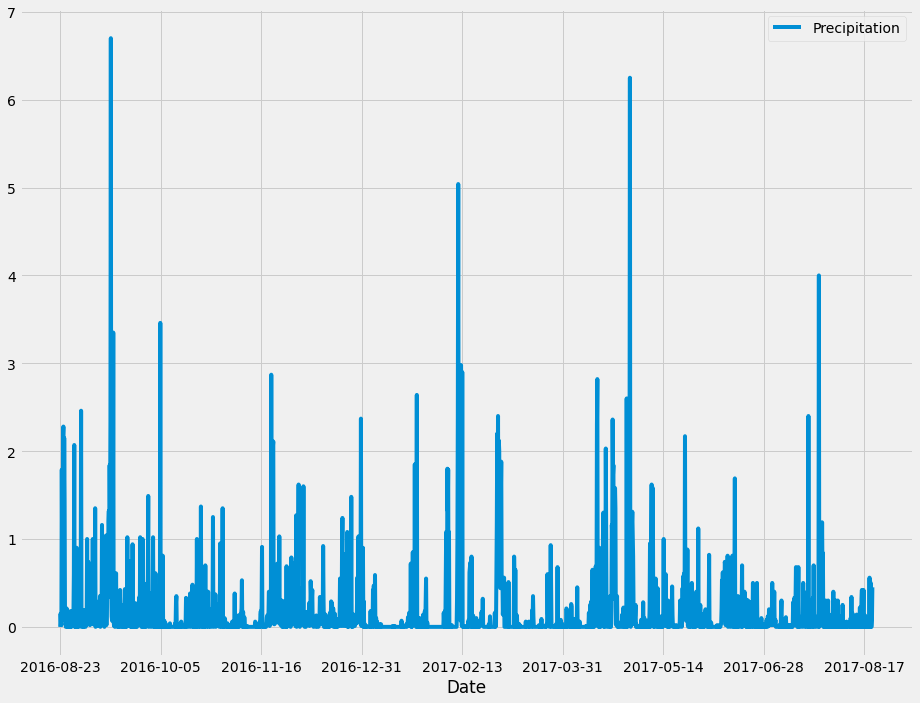

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = link.query(Measurements.date).order_by(Measurements.date.desc()).first().date

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(one_year)

# Perform a query to retrieve the data and precipitation scores

pre = link.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= one_year, Measurements.prcp != None).\
    order_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
data_frame = pd.DataFrame(pre, columns=['Date', 'Precipitation'])
data_frame.set_index('Date', inplace=True)
data_frame.head()


# Use Pandas Plotting with Matplotlib to plot the data
data_frame.plot(figsize=(13,10))
plt.tight_layout()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_frame.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
link.query(Measurements.station).distinct().count()


9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = link.query(Measurements.station,func.count(Measurements.station)).\
                               group_by(Measurements.station).\
                               order_by(func.count(Measurements.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Answer the following question: which station id has the greatest number of observations?

USC00519281

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sum_temp = link.query(func.min(Measurements.tobs), func.max(Measurements.tobs),\
                      func.avg(Measurements.tobs)).\
                      filter(Measurements.station == 'USC00519281' ).all()
sum_temp

[(54.0, 85.0, 71.66378066378067)]

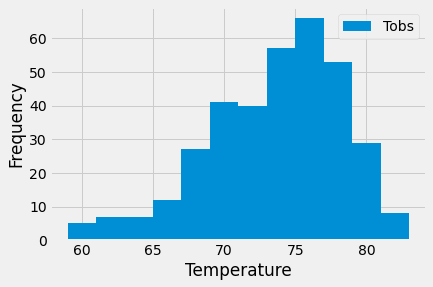

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_months = link.query(Measurements.tobs).\
      filter(Measurements.date >= one_year, Measurements.station == 'USC00519281').\
      order_by(Measurements.tobs).all()

da_frame = pd.DataFrame(temp_months, columns=['Tobs'])

bins = 12
da_frame.plot.hist(bins=bins)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [34]:
# Close Session
link.close()